In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# training dataset path : /content/drive/MyDrive/new_project/train
# testing dataset path : /content/drive/MyDrive/new_project/test

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for training and testing data
train_dir = '/content/drive/MyDrive/new_project/train'
test_dir = '/content/drive/MyDrive/new_project/test'

In [ ]:
# Define data generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the training directory
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # Since we use binary_crossentropy loss, we need binary labels

Found 557 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 32 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 140 images belonging to 2 classes.


In [ ]:
# Check class indices
print(train_generator.class_indices)  # Should output {'cats': 0, 'dogs': 1}

{'cats': 0, 'dogs': 1}


In [ ]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so sigmoid activation
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10
17/17 [==============================] - 228s 13s/step - loss: 0.7581 - accuracy: 0.4895 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
17/17 [==============================] - 32s 2s/step - loss: 0.6940 - accuracy: 0.4838 - val_loss: 0.6930 - val_accuracy: 0.4844
Epoch 3/10
17/17 [==============================] - 30s 2s/step - loss: 0.6957 - accuracy: 0.4952 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 4/10
17/17 [==============================] - 30s 2s/step - loss: 0.6925 - accuracy: 0.5086 - val_loss: 0.6922 - val_accuracy: 0.5391
Epoch 5/10
17/17 [==============================] - 30s 2s/step - loss: 0.6906 - accuracy: 0.5390 - val_loss: 0.6903 - val_accuracy: 0.4844
Epoch 6/10
17/17 [==============================] - 31s 2s/step - loss: 0.6832 - accuracy: 0.5733 - val_loss: 0.6861 - val_accuracy: 0.5312
Epoch 7/10
17/17 [==============================] - 30s 2s/step - loss: 0.6583 - accuracy: 0.6019 - val_loss: 0.6836 - val_accuracy: 0.5859
Epoch 8/10
17/17 [

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

5/5 [==============================] - 4s 561ms/step - loss: 0.8442 - accuracy: 0.5143
Test accuracy: 0.5142857432365417


In [ ]:
# Fine-tune the model based on evaluation results

# Visualize performance
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

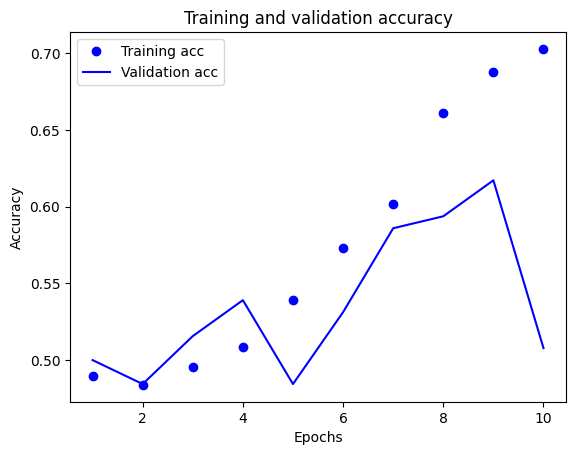

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

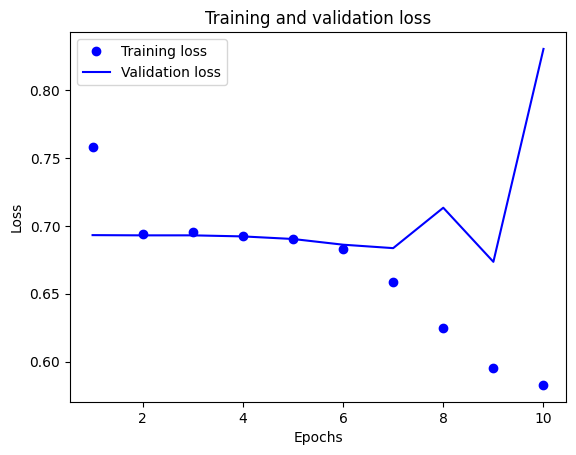

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.show()

In [ ]:
# Save the model in the native Keras format
model.save('cats_dogs_classifier.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('cats_dogs_classifier.keras')

**up to now the model is trained**
<h3> Now we can predict or classify the given image is "a cat" or "a dog"</h3>


In [ ]:
# PREDICTION 1 : input image is "DOG"

In [112]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
# Function to preprocess input image

In [113]:
# Function to preprocess input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch
    img_array /= 255.  # Normalize pixel values
    return img_array

In [114]:
# Path to the input image you want to classify
image_path = '/content/drive/MyDrive/new_project/inputs/DOG1.jpg'

In [115]:
# Preprocess the input image
input_image = preprocess_image(image_path)

In [116]:
# Load the saved model
loaded_model = load_model('cats_dogs_classifier.keras')

In [117]:
# Make predictions
predictions = loaded_model.predict(input_image)

1/1 [==============================] - 0s 100ms/step


In [118]:
# Interpret the predictions
if predictions[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

It's a dog!


In [ ]:
# method 2

In [ ]:
# # Interpret the predictions
# confidence_percentage = predictions[0][0] * 100
# if confidence_percentage > 50:
#     print("It's a dog with {:.2f}% confidence.".format(confidence_percentage))
# else:
#     print("It's a cat with {:.2f}% confidence.".format(100 - confidence_percentage))

In [119]:
# Interpret the predictions
confidence_percentage = predictions[0][0] * 100
if confidence_percentage > 50:
    print("It's a dog with {:.2f}% confidence.".format(confidence_percentage))
elif confidence_percentage < 50:
    print("It's a cat with {:.2f}% confidence.".format(100 - confidence_percentage))
else:
    print("The model is uncertain about the classification.")

It's a dog with 81.42% confidence.


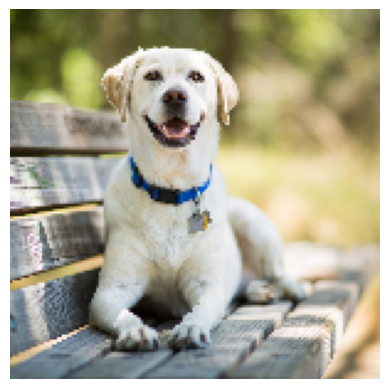

In [120]:
# Display the input image
plt.imshow(input_image[0])  # Access the first image in the batch
plt.axis('off')
plt.show()

In [ ]:
# PREDICTION 2 : input image is "CAT"

In [121]:
# Function to preprocess input image
def preprocess_image_cat(image_path_cat):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array /= 255.  # Normalize pixel values
    return img_array

In [122]:
# Path to the input image you want to classify
image_path_cat = '/content/drive/MyDrive/new_project/inputs/cat_96.jpg'

In [123]:
# Preprocess the input image
input_image_cat = preprocess_image_cat(image_path_cat)

In [124]:
# Load the saved model
loaded_model_cat = load_model('cats_dogs_classifier.keras')

In [125]:
# Make predictions
input_image_cat_expanded = np.expand_dims(input_image_cat, axis=0)  # Add batch dimension
predictions_cat = loaded_model_cat.predict(input_image_cat_expanded)

1/1 [==============================] - 0s 188ms/step


In [126]:
# Interpret the predictions
if predictions_cat[0] < 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

It's a cat!


In [ ]:
# method 2

In [129]:
# Function to preprocess input image
def preprocess_image_cat(image_path_cat):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array /= 255.  # Normalize pixel values
    return img_array

In [130]:
# Path to the input image you want to classify
image_path_cat = '/content/drive/MyDrive/new_project/inputs/cat_96.jpg'

In [131]:
# Preprocess the input image
input_image_cat = preprocess_image_cat(image_path_cat)

In [132]:
# Load the saved model
loaded_model_cat = load_model('cats_dogs_classifier.keras')

In [133]:
# Make predictions
input_image_cat_expanded = np.expand_dims(input_image_cat, axis=0)  # Add batch dimension
predictions_cat = loaded_model_cat.predict(input_image_cat_expanded)

1/1 [==============================] - 0s 109ms/step


It's a cat with 66.05% confidence.


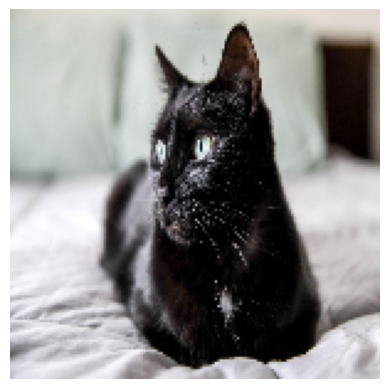

In [142]:
# Interpret the predictions
confidence_percentage = predictions_cat[0][0] * 100
if confidence_percentage < 50:
    print("It's a dog with {:.2f}% confidence.".format(100 - confidence_percentage))
elif confidence_percentage > 50:
    print("It's a cat with {:.2f}% confidence.".format(confidence_percentage))

    # Display the input image only if the model predicts it as a cat
    plt.imshow(input_image_cat)
    plt.axis('off')
    plt.show()
else:
    print("The model is uncertain about the classification.")

In [142]:
# PREDICTION CASE - 3 : NOT A CAT AND NOT A DOG

In [143]:
# Function to preprocess input image
def preprocess_image_not(image_path_not):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array /= 255.  # Normalize pixel values
    return img_array

In [144]:
# Path to the input image you want to classify
image_path_not = '/content/drive/MyDrive/new_project/inputs/not_classified_parrot.jpeg'

In [145]:
# Preprocess the input image
input_image_not = preprocess_image_not(image_path_not)

In [146]:
# Load the saved model
loaded_model_not = load_model('cats_dogs_classifier.keras')

In [149]:
# Make predictions
input_image_not_expanded = np.expand_dims(input_image_not, axis=0)  # Add batch dimension
predictions_not = loaded_model_not.predict(input_image_not_expanded)

1/1 [==============================] - 0s 109ms/step


In [161]:
# Interpret the predictions
confidence_percentage_cat = predictions_not[0][0] * 100
confidence_percentage_dog = predictions_not[0][0] * 100

In [159]:
if confidence_percentage_cat < 50 and confidence_percentage_dog < 50:
    print("The model is uncertain about the classification.")
    # Display the input image
    plt.imshow(input_image)  # Use the correct variable holding the input image data
    plt.axis('off')
    plt.show()
elif confidence_percentage_cat > confidence_percentage_dog:
    print("It's a cat with {:.2f}% confidence.".format(confidence_percentage_cat))
else:
    print("It's a dog with {:.2f}% confidence.".format(confidence_percentage_dog))

It's a dog with 81.42% confidence.


1/1 [==============================] - 0s 101ms/step
The model is uncertain about the classification.


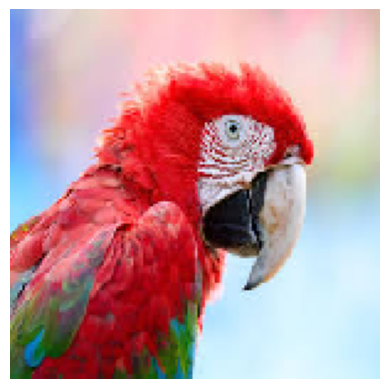

In [165]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Function to preprocess input image
def preprocess_image_not(image_path_not):
    img = image.load_img(image_path_not, target_size=(150, 150))  # Use image_path_not
    img_array = image.img_to_array(img)
    img_array /= 255.  # Normalize pixel values
    return img_array

# Path to the input image you want to classify
image_path_not = '/content/drive/MyDrive/new_project/inputs/not_classified_parrot.jpeg'

# Preprocess the input image
input_image_not = preprocess_image_not(image_path_not)

# Load the saved model
loaded_model_not = load_model('cats_dogs_classifier.keras')

# Make predictions
input_image_not_expanded = np.expand_dims(input_image_not, axis=0)  # Add batch dimension
predictions_not = loaded_model_not.predict(input_image_not_expanded)

# Interpret the predictions
confidence_percentage_cat = predictions_not[0][0] * 100

# Check if the predictions array has enough elements
if len(predictions_not[0]) >= 2:
    confidence_percentage_dog = predictions_not[0][1] * 100  # Use the probability of the "dog" class here
else:
    confidence_percentage_dog = 0  # Set confidence percentage for dog to 0 if not available

# Print the classification result
if confidence_percentage_cat < 50 and confidence_percentage_dog < 50:
    print("It's a cat with {:.2f}% confidence.".format(confidence_percentage_cat))
elif confidence_percentage_cat > confidence_percentage_dog:
    print("The model is uncertain about the classification.")
    # Display the input image
    plt.imshow(input_image_not)  # Use the correct variable holding the input image data
    plt.axis('off')
    plt.show()
else:
    print("It's a dog with {:.2f}% confidence.".format(confidence_percentage_dog))